(150, 5)
[[5.1, 3.5], [4.9, 3.0], [4.7, 3.2], [4.6, 3.1], [5.0, 3.6], [5.4, 3.9], [4.6, 3.4], [5.0, 3.4], [4.4, 2.9], [4.9, 3.1], [5.4, 3.7], [4.8, 3.4], [4.8, 3.0], [4.3, 3.0], [5.8, 4.0], [5.7, 4.4], [5.4, 3.9], [5.1, 3.5], [5.7, 3.8], [5.1, 3.8], [5.4, 3.4], [5.1, 3.7], [4.6, 3.6], [5.1, 3.3], [4.8, 3.4], [5.0, 3.0], [5.0, 3.4], [5.2, 3.5], [5.2, 3.4], [4.7, 3.2], [4.8, 3.1], [5.4, 3.4], [5.2, 4.1], [5.5, 4.2], [4.9, 3.1], [5.0, 3.2], [5.5, 3.5], [4.9, 3.6], [4.4, 3.0], [5.1, 3.4], [5.0, 3.5], [4.5, 2.3], [4.4, 3.2], [5.0, 3.5], [5.1, 3.8], [4.8, 3.0], [5.1, 3.8], [4.6, 3.2], [5.3, 3.7], [5.0, 3.3]]
[[41, 13], [36, 41], [22, 13], [22, 32], [15, 14], [15, 32], [18, 14], [18, 36]]


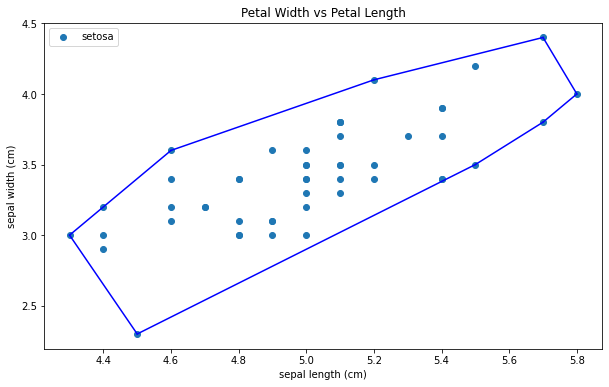

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    #print(type(bucket))
    print(bucket.tolist())
    #print(bucket.tolist())
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    #print(type(hull.simplices))
    print(hull.simplices.tolist())
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        plt.legend()
    break


(150, 5)
[[5.1, 3.5], [4.9, 3.0], [4.7, 3.2], [4.6, 3.1], [5.0, 3.6], [5.4, 3.9], [4.6, 3.4], [5.0, 3.4], [4.4, 2.9], [4.9, 3.1], [5.4, 3.7], [4.8, 3.4], [4.8, 3.0], [4.3, 3.0], [5.8, 4.0], [5.7, 4.4], [5.4, 3.9], [5.1, 3.5], [5.7, 3.8], [5.1, 3.8], [5.4, 3.4], [5.1, 3.7], [4.6, 3.6], [5.1, 3.3], [4.8, 3.4], [5.0, 3.0], [5.0, 3.4], [5.2, 3.5], [5.2, 3.4], [4.7, 3.2], [4.8, 3.1], [5.4, 3.4], [5.2, 4.1], [5.5, 4.2], [4.9, 3.1], [5.0, 3.2], [5.5, 3.5], [4.9, 3.6], [4.4, 3.0], [5.1, 3.4], [5.0, 3.5], [4.5, 2.3], [4.4, 3.2], [5.0, 3.5], [5.1, 3.8], [4.8, 3.0], [5.1, 3.8], [4.6, 3.2], [5.3, 3.7], [5.0, 3.3]]
[[49, 47], [47, 45], [12, 48], [48, 49], [49, 47], [47, 45], [12, 48], [48, 49], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47], [47, 45], [49, 47],

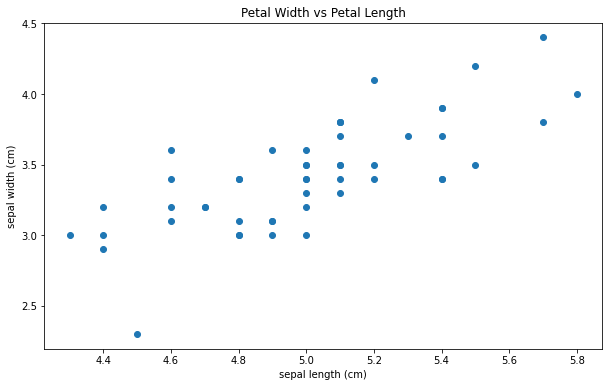

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
#from bryanhull import ConvexHull
import bryanhull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    bucketlst = bucket.tolist()

    print(bucketlst)
    hull = bryanhull.ConvexHull(bucketlst) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    print(hull.simplices)
    print(hull.convexhullpoints)
    
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    break
    #hull.simplices = np.array(hull.simplices)
    #break
    #print(hull.simplices)
    #for simplex in hull.simplices:
    #    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    #    plt.legend()